## Run MR

#### Thank you Storm et al: https://www.nature.com/articles/s41467-021-26280-1 and Mishra et al: https://www.researchgate.net/publication/357596053_Stroke_genetics_informs_drug_discovery_and_risk_prediction_across_ancestries

In [5]:
install.packages("remotes")
remotes::install_github("MRCIEU/TwoSampleMR@0.4.26")

Installing package into ‘/usr/local/lib/R/site-library’

(as ‘lib’ is unspecified)







bitops (NA -> 1.0-7   ) [CRAN]

httpuv (NA -> 1.6.5   ) [CRAN]

RCurl  (NA -> 1.98-1.5) [CRAN]


Installing 3 packages: bitops, httpuv, RCurl



Installing packages into ‘/usr/local/lib/R/site-library’

(as ‘lib’ is unspecified)




✔  checking for file ‘/tmp/RtmprniHi8/remotes85357d8c25/MRCIEU-TwoSampleMR-8d4167f/DESCRIPTION’

─  preparing ‘TwoSampleMR’:

✔  checking DESCRIPTION meta-information

─  checking for LF line-endings in source and make files and shell scripts

─  checking for empty or unneeded directories

   Omitted ‘LazyData’ from DESCRIPTION

─  building ‘TwoSampleMR_0.4.26.tar.gz’

   



Installing package into ‘/usr/local/lib/R/site-library’

(as ‘lib’ is unspecified)




In [32]:
install.packages('R.utils')

Installing package into ‘/usr/local/lib/R/site-library’

(as ‘lib’ is unspecified)



also installing the dependencies ‘R.oo’, ‘R.methodsS3’






In [6]:
library("TwoSampleMR")

Welcome to TwoSampleMR.

[>] Full documentation: https://mrcieu.github.io/TwoSampleMR

[>] Check news(package='TwoSampleMR') for bug fixes and updates

[>] By generating access tokens to retrieve data from the MR-Base

    database you consent to having your email address logged on

    our servers. For info on how this is used see logging_info()

[>] NOTE: We will be rolling out extensive changes to the database

    in the next few weeks. To ensure backwards compatibility please

    keep the R package updated.






You are running an old version of the TwoSampleMR package.

This version:   0.4.26

Latest version: 0.5.6

Please consider updating using devtools::install_github('MRCIEU/TwoSampleMR')




In [29]:
library("dplyr")
library("stringr")
library("data.table")



Attaching package: ‘data.table’





The following objects are masked from ‘package:dplyr’:



    between, first, last






In [17]:
system("dx download eqtl_5kb_format.txt", intern=TRUE)

character(0)

In [20]:
exp <- read_exposure_data(
  filename = "eqtl_5kb_format.txt",
  sep = "\t",
  snp_col = "SNP",
  beta_col = "beta",
  se_col = "se",
  eaf_col = "new_f",
  effect_allele_col = "AssessedAllele",
  other_allele_col = "OtherAllele",
  pval_col = "Pvalue",
  phenotype_col = "GeneSymbol",
  samplesize_col = "NrSamples",
  min_pval = 1e-400
)

In [25]:
system("dx download GWAS/ALS_sumstats_EUR_only.txt.gz", intern=TRUE)

character(0)

In [33]:
gwas <- fread("ALS_sumstats_EUR_only.txt.gz")

In [34]:
gwas

rsid,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,N_effective
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs10900604,1,798400,a,g,0.7844,-0.0198,0.0171,0.24710,47264
rs11240777,1,798959,a,g,0.2155,0.0195,0.0171,0.25200,47264
rs11240779,1,808631,a,g,0.7493,-0.0181,0.0186,0.32920,47264
rs11240780,1,808928,t,c,0.7502,-0.0189,0.0187,0.31130,47264
rs117086422,1,845635,t,c,0.2017,0.0289,0.0178,0.10440,57240
rs57760052,1,845938,a,g,0.2148,0.0277,0.0178,0.11970,57240
rs28612348,1,846078,t,c,0.1906,0.0277,0.0176,0.11560,57240
rs58781670,1,846398,a,g,0.2085,0.0292,0.0182,0.10930,57240
rs4475691,1,846808,t,c,0.1968,0.0256,0.0173,0.13870,57240


In [38]:
outcome <- read_outcome_data(snps = exp$SNP,
                                     filename = "ALS_sumstats_EUR_only.txt.gz",
                                     sep = "\t",
                                     snp_col = "rsid",
                                     beta_col = "beta",
                                     se_col = "standard_error",
                                     effect_allele_col = "effect_allele",
                                     other_allele_col = "other_allele",
                                     eaf_col = "effect_allele_frequency",
                                     pval_col = "p_value",
                                    samplesize_col = "N_effective")

No phenotype name specified, defaulting to 'outcome'.




In [ ]:
harm <- harmonise_data(
  exposure_dat = exp,
  outcome_dat = outcome)

In [48]:
harm1 <- harm[harm$mr_keep =='TRUE',]
## ld clumpin will fail if you have a gene with snps all <0.01 freq
harm2 <- harm1[harm1$eaf.exposure > 0.01 & harm1$eaf.outcome > 0.01,]
harm2

,SNP,effect_allele.exposure,other_allele.exposure,effect_allele.outcome,other_allele.outcome,beta.exposure,beta.outcome,eaf.exposure,eaf.outcome,remove,⋯,se.exposure,pval.exposure,samplesize.exposure,exposure,mr_keep.exposure,pval_origin.exposure,id.exposure,data_source.exposure,action,mr_keep
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,rs1000002,T,C,T,C,-0.5064371,0.0040,0.47498967,0.4830,FALSE,⋯,0.007428781,3.2717e-310,31684,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE
2,rs1016752,G,C,G,C,0.5656356,0.0134,0.37403226,0.3727,FALSE,⋯,0.007616685,3.2717e-310,31296,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE
4,rs10937158,T,C,T,C,0.6291454,0.0021,0.43400729,0.4400,FALSE,⋯,0.007193719,3.2717e-310,31684,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE
7,rs112396093,C,A,C,A,-0.6632943,0.0109,0.31454779,0.3213,FALSE,⋯,0.007715335,3.2717e-310,31567,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE
8,rs112737137,T,C,T,C,-0.2138405,-0.0161,0.11714415,0.1140,FALSE,⋯,0.012316650,1.6005e-67,31568,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE
9,rs112754234,C,G,C,G,-0.6711919,0.0091,0.38365290,0.3872,FALSE,⋯,0.007260148,3.2717e-310,31569,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE
12,rs1132776,A,G,A,G,0.6301596,0.0025,0.43787816,0.4405,FALSE,⋯,0.007181911,3.2717e-310,31684,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE
13,rs113422085,T,C,T,C,-0.3640048,-0.0122,0.07677210,0.0723,FALSE,⋯,0.014807476,1.9391e-133,31569,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE
14,rs114229290,A,G,A,G,-0.4853676,0.0107,0.05368570,0.0438,FALSE,⋯,0.018156191,1.9467e-157,29141,ABCC5,TRUE,reported,ZlgOMk,textfile,2,TRUE


In [ ]:
## non-conservative LD clumping 

data_02 <- clump_data(harm2, clump_r2 = 0.2)


In [46]:
test <- harm2[harm2$id.exposure =="2ixGjX",]
test

,SNP,effect_allele.exposure,other_allele.exposure,effect_allele.outcome,other_allele.outcome,beta.exposure,beta.outcome,eaf.exposure,eaf.outcome,remove,⋯,se.exposure,pval.exposure,samplesize.exposure,exposure,mr_keep.exposure,pval_origin.exposure,id.exposure,data_source.exposure,action,mr_keep
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<lgl>
34064,rs10128595,A,C,A,C,0.3862533,0.0275,0.1431189,0.0020,FALSE,⋯,0.03999144,4.5288e-22,2456,ESRRA,TRUE,reported,2ixGjX,textfile,2,TRUE
34065,rs10128649,C,G,C,G,0.3834092,0.0553,0.1371209,0.0019,FALSE,⋯,0.04174161,4.1076e-20,2341,ESRRA,TRUE,reported,2ixGjX,textfile,2,TRUE
34066,rs2079786,G,T,G,T,0.3640332,0.0048,0.1537052,0.0020,FALSE,⋯,0.03887292,7.6339e-21,2456,ESRRA,TRUE,reported,2ixGjX,textfile,2,TRUE
34067,rs41294376,A,C,A,C,0.3761915,-0.1141,0.1433476,0.0021,FALSE,⋯,0.04107029,5.2090e-20,2330,ESRRA,TRUE,reported,2ixGjX,textfile,2,TRUE
34068,rs41294424,A,C,A,C,0.3912575,0.0055,0.1458778,0.0020,FALSE,⋯,0.04060541,5.6561e-22,2341,ESRRA,TRUE,reported,2ixGjX,textfile,2,TRUE
34069,rs493052,A,G,A,G,0.3917109,-0.1275,0.1623377,0.0025,FALSE,⋯,0.04278282,5.3957e-20,1925,ESRRA,TRUE,reported,2ixGjX,textfile,2,TRUE
34070,rs605827,C,T,C,T,0.3883531,-0.1482,0.1941989,0.0027,FALSE,⋯,0.04101180,2.8200e-21,1810,ESRRA,TRUE,reported,2ixGjX,textfile,2,TRUE
34071,rs650008,C,T,C,T,0.4289030,-0.0501,0.2146387,0.0026,FALSE,⋯,0.04145432,4.3543e-25,1619,ESRRA,TRUE,reported,2ixGjX,textfile,2,TRUE


In [50]:
fwrite(data_02, "eqtl_gen_als_clumped_r02.txt", sep='\t')

In [52]:
system("dx upload eqtl_gen_als_clumped_r02.txt", intern=TRUE)

[1] "ID                    file-G7QFZqQ0fFY1GbgqKYJgQXJk"   
 [2] "Class                 file"                            
 [3] "Project               project-G7KF0800fFY3YkPqPgfkqyPy"
 [4] "Folder                /"                               
 [5] "Name                  eqtl_gen_als_clumped_r02.txt"    
 [6] "State                 closing"                         
 [7] "Visibility            visible"                         
 [8] "Types                 -"                               
 [9] "Properties            -"                               
[10] "Tags                  -"                               
[11] "Outgoing links        -"                               
[12] "Created               Thu Jan 13 23:49:02 2022"        
[13] "Created by            leonardhl"                       
[14] " via the job          job-G7Q96000fFY75JgQ0Bj0PF3f"    
[15] "Last modified         Thu Jan 13 23:49:03 2022"        
[16] "Media type            "                                
[17] "archivalState         \"live\""                        
[18] "cloudAccount          \"cloudaccount-dnanexus\""

In [54]:
str(data_02)

'data.frame':	6463 obs. of  30 variables:

 $ SNP                   : chr  "rs10952346" "rs13310351" "rs28469460" "rs36144291" ...

 $ effect_allele.exposure: chr  "A" "T" "C" "C" ...

 $ other_allele.exposure : chr  "C" "C" "T" "T" ...

 $ effect_allele.outcome : chr  "A" "T" "C" "C" ...

 $ other_allele.outcome  : chr  "C" "C" "T" "T" ...

 $ beta.exposure         : num  0.1113 -0.0879 -0.0718 0.0743 -0.1178 ...

 $ beta.outcome          : num  0.0171 0.0109 -0.0152 0.0051 0.0047 0.006 -0.0154 0.0056 -0.0175 0.0035 ...

 $ eaf.exposure          : num  0.0436 0.0852 0.3665 0.184 0.1008 ...

 $ eaf.outcome           : num  0.0347 0.0834 0.3382 0.1982 0.092 ...

 $ remove                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ palindromic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ ambiguous             : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ id.outcome            : chr  "5jzLgg" "5jzLgg" "5jzLgg" "5jzLgg" ...

 $ se.outcome            : num  0.0

In [68]:
data_02_2 <- data_02
data_02_2$samplesize.outcome <- 152268

In [69]:
colnames(data_02_2)

[1] "SNP"                    "effect_allele.exposure" "other_allele.exposure" 
 [4] "effect_allele.outcome"  "other_allele.outcome"   "beta.exposure"         
 [7] "beta.outcome"           "eaf.exposure"           "eaf.outcome"           
[10] "remove"                 "palindromic"            "ambiguous"             
[13] "id.outcome"             "se.outcome"             "pval.outcome"          
[16] "samplesize.outcome"     "outcome"                "mr_keep.outcome"       
[19] "pval_origin.outcome"    "data_source.outcome"    "se.exposure"           
[22] "pval.exposure"          "samplesize.exposure"    "exposure"              
[25] "mr_keep.exposure"       "pval_origin.exposure"   "id.exposure"           
[28] "data_source.exposure"   "action"                 "mr_keep"               
[31] "r.outcome"

In [70]:
data_02_2$r.outcome <- get_r_from_lor(data_02_2$beta.outcome, af = data_02_2$eaf.outcome, ncase = 29612, ncontrol = 122656, prevalence = 0.000006, model='logit')



#data_02_2$r.exposure <- get_r_from_lor(data_02_2$beta.exposure, af = data_02_2$eaf.exposure, ncase = 29612, ncontrol = 122656, prevalence = 0.000006, model='logit')


In [ ]:
data_02_2$units.outcome <-"log odds"
data_02_2$units.exposure<-"log odds"
#If EAF abscent we  will not be able to calcuclate r2

data_02_2$r.outcome<- get_r_from_lor(dat1$beta.exposure, dat1$eaf.exposure, dat1$ncase.exposure, dat1$ncontrol.exposure, model = "logit")
#Steiger filtering was performed to exclude SNPs that explain more variance in the outcome than in the exposure
steiger <- steiger_filtering(dat1)

In [ ]:
steiger_02 <- directionality_test(data_02_2)

In [75]:
head(steiger_02)

,id.exposure,id.outcome,exposure,outcome,snp_r2.exposure,snp_r2.outcome,correct_causal_direction,steiger_pval
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>
1,05dAiC,5jzLgg,HIPK2,outcome,0.010240331,2.591510e-05,TRUE,4.654432e-49
2,079Lrj,5jzLgg,TUBB2B,outcome,0.003350019,2.711498e-06,TRUE,2.117727e-14
3,0aJ3dV,5jzLgg,SULT2B1,outcome,0.009137255,2.114284e-05,TRUE,5.171234e-46
4,0ciMG6,5jzLgg,ARNT,outcome,0.035154814,1.855896e-04,TRUE,1.953754e-145
5,0EX9Nc,5jzLgg,CD6,outcome,0.063244887,2.036175e-04,TRUE,0.000000e+00
6,0FJdgU,5jzLgg,PDF,outcome,0.019334764,4.468360e-05,TRUE,1.105832e-79


In [76]:
steiger_02_filter <- steiger_02[steiger_02$correct_causal_direction == 'TRUE',]
str(steiger_02_filter)

'data.frame':	863 obs. of  8 variables:

 $ id.exposure             : chr  "05dAiC" "079Lrj" "0aJ3dV" "0ciMG6" ...

 $ id.outcome              : chr  "5jzLgg" "5jzLgg" "5jzLgg" "5jzLgg" ...

 $ exposure                : chr  "HIPK2" "TUBB2B" "SULT2B1" "ARNT" ...

 $ outcome                 : chr  "outcome" "outcome" "outcome" "outcome" ...

 $ snp_r2.exposure         : num  0.01024 0.00335 0.00914 0.03515 0.06324 ...

 $ snp_r2.outcome          : num  2.59e-05 2.71e-06 2.11e-05 1.86e-04 2.04e-04 ...

 $ correct_causal_direction: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...

 $ steiger_pval            : num  4.65e-49 2.12e-14 5.17e-46 1.95e-145 0.00 ...


In [77]:
str(data_02_2)

'data.frame':	6463 obs. of  31 variables:

 $ SNP                   : chr  "rs10952346" "rs13310351" "rs28469460" "rs36144291" ...

 $ effect_allele.exposure: chr  "A" "T" "C" "C" ...

 $ other_allele.exposure : chr  "C" "C" "T" "T" ...

 $ effect_allele.outcome : chr  "A" "T" "C" "C" ...

 $ other_allele.outcome  : chr  "C" "C" "T" "T" ...

 $ beta.exposure         : num  0.1113 -0.0879 -0.0718 0.0743 -0.1178 ...

 $ beta.outcome          : num  0.0171 0.0109 -0.0152 0.0051 0.0047 0.006 -0.0154 0.0056 -0.0175 0.0035 ...

 $ eaf.exposure          : num  0.0436 0.0852 0.3665 0.184 0.1008 ...

 $ eaf.outcome           : num  0.0347 0.0834 0.3382 0.1982 0.092 ...

 $ remove                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ palindromic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ ambiguous             : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ id.outcome            : chr  "5jzLgg" "5jzLgg" "5jzLgg" "5jzLgg" ...

 $ se.outcome            : num  0.0

In [80]:
data_02_final <- data_02_2[data_02_2$exposure %in% steiger_02_filter$exposure,]
str(data_02_final)

'data.frame':	6463 obs. of  31 variables:

 $ SNP                   : chr  "rs10952346" "rs13310351" "rs28469460" "rs36144291" ...

 $ effect_allele.exposure: chr  "A" "T" "C" "C" ...

 $ other_allele.exposure : chr  "C" "C" "T" "T" ...

 $ effect_allele.outcome : chr  "A" "T" "C" "C" ...

 $ other_allele.outcome  : chr  "C" "C" "T" "T" ...

 $ beta.exposure         : num  0.1113 -0.0879 -0.0718 0.0743 -0.1178 ...

 $ beta.outcome          : num  0.0171 0.0109 -0.0152 0.0051 0.0047 0.006 -0.0154 0.0056 -0.0175 0.0035 ...

 $ eaf.exposure          : num  0.0436 0.0852 0.3665 0.184 0.1008 ...

 $ eaf.outcome           : num  0.0347 0.0834 0.3382 0.1982 0.092 ...

 $ remove                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ palindromic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ ambiguous             : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

 $ id.outcome            : chr  "5jzLgg" "5jzLgg" "5jzLgg" "5jzLgg" ...

 $ se.outcome            : num  0.0

In [ ]:
mr_data_02 <- mr(data_02_final)

In [84]:
mr_data_filt <- mr_data_02[,c("exposure", "outcome", "nsnp", "method", "b", "se", "pval")]
mr_data_filt$clump_thresh <- "0.2"
mr_data_filt$fdr_qval <- "NA"

In [85]:
fdr_data <- mr_data_filt[mr_data_filt$method == "IVW" | mr_data_filt$method == "Inverse variance weighted" | mr_data_filt$method == "Wald ratio",]


fdr_data$fdr_qval <- p.adjust(fdr_data$pval, method = "fdr")

head(fdr_data)



,exposure,outcome,nsnp,method,b,se,pval,clump_thresh,fdr_qval
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
3,HIPK2,outcome,6,Inverse variance weighted,0.04635870,0.08332712,0.57797442,0.2,0.8768088
6,TUBB2B,outcome,2,Inverse variance weighted,0.02631958,0.14846060,0.85928592,0.2,0.9757418
9,SULT2B1,outcome,5,Inverse variance weighted,-0.07196818,0.09174051,0.43276115,0.2,0.8010565
14,ARNT,outcome,8,Inverse variance weighted,0.10008828,0.05923032,0.09106336,0.2,0.4361452
19,CD6,outcome,14,Inverse variance weighted,0.03660480,0.03894110,0.34721534,0.2,0.7436249
24,PDF,outcome,4,Inverse variance weighted,-0.09043813,0.05623168,0.10776668,0.2,0.4604091


In [87]:
genes <- fdr_data[fdr_data$fdr_qval < 0.05,]
genes

,exposure,outcome,nsnp,method,b,se,pval,clump_thresh,fdr_qval
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
122,RPS6KA1,outcome,7,Inverse variance weighted,0.16146503,0.04163225,1.051613e-04,0.2,0.015125693
228,ABCC3,outcome,27,Inverse variance weighted,0.04493490,0.01135178,7.545295e-05,0.2,0.015125693
388,AXL,outcome,6,Inverse variance weighted,0.25810720,0.07352765,4.475306e-04,0.2,0.038808274
544,VEGFA,outcome,9,Inverse variance weighted,0.24407448,0.06273034,9.989283e-05,0.2,0.015125693
618,SULT1A2,outcome,3,Inverse variance weighted,-0.10139519,0.02598499,9.537454e-05,0.2,0.015125693
832,THRA,outcome,9,Inverse variance weighted,-0.09980906,0.02896067,5.681816e-04,0.2,0.038808274
1301,TSHR,outcome,8,Inverse variance weighted,0.24475342,0.06030214,4.932874e-05,0.2,0.015125693
1352,MGST2,outcome,18,Inverse variance weighted,0.03939092,0.01155264,6.503659e-04,0.2,0.040090412
1824,GRIK4,outcome,38,Inverse variance weighted,-0.08450158,0.01760887,1.596134e-06,0.2,0.001377464


In [88]:
fwrite(genes, 'nominated_genes.txt', sep='\t')

In [90]:
system('dx upload nominated_genes.txt', intern=TRUE)

[1] "ID                    file-G7QJbp80fFYFqjvkF8PB3Kgb"   
 [2] "Class                 file"                            
 [3] "Project               project-G7KF0800fFY3YkPqPgfkqyPy"
 [4] "Folder                /"                               
 [5] "Name                  nominated_genes.txt"             
 [6] "State                 closing"                         
 [7] "Visibility            visible"                         
 [8] "Types                 -"                               
 [9] "Properties            -"                               
[10] "Tags                  -"                               
[11] "Outgoing links        -"                               
[12] "Created               Fri Jan 14 02:07:37 2022"        
[13] "Created by            leonardhl"                       
[14] " via the job          job-G7Q96000fFY75JgQ0Bj0PF3f"    
[15] "Last modified         Fri Jan 14 02:07:38 2022"        
[16] "Media type            "                                
[17] "archivalState         \"live\""                        
[18] "cloudAccount          \"cloudaccount-dnanexus\""

In [92]:
system('dx upload run_mr.ipynb', intern=TRUE)

[1] "ID                    file-G7QJf1j0fFYPX83f83468ZzG"   
 [2] "Class                 file"                            
 [3] "Project               project-G7KF0800fFY3YkPqPgfkqyPy"
 [4] "Folder                /"                               
 [5] "Name                  run_mr.ipynb"                    
 [6] "State                 closing"                         
 [7] "Visibility            visible"                         
 [8] "Types                 -"                               
 [9] "Properties            -"                               
[10] "Tags                  -"                               
[11] "Outgoing links        -"                               
[12] "Created               Fri Jan 14 02:08:07 2022"        
[13] "Created by            leonardhl"                       
[14] " via the job          job-G7Q96000fFY75JgQ0Bj0PF3f"    
[15] "Last modified         Fri Jan 14 02:08:07 2022"        
[16] "Media type            "                                
[17] "archivalState         \"live\""                        
[18] "cloudAccount          \"cloudaccount-dnanexus\""

In [102]:
genes$or <- exp(genes$b)
genes$or_lci95 <- exp(genes$b-1.96*genes$se)
genes$or_uci95 <- exp(genes$b+1.96*genes$se)

In [103]:
head(genes)

,exposure,outcome,nsnp,method,b,se,pval,clump_thresh,fdr_qval,or,or_lci95,or_uci95
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
122,RPS6KA1,outcome,7,Inverse variance weighted,0.16146503,0.04163225,1.051613e-04,0.2,0.01512569,1.1752314,1.0831417,1.2751505
228,ABCC3,outcome,27,Inverse variance weighted,0.04493490,0.01135178,7.545295e-05,0.2,0.01512569,1.0459598,1.0229447,1.0694927
388,AXL,outcome,6,Inverse variance weighted,0.25810720,0.07352765,4.475306e-04,0.2,0.03880827,1.2944776,1.1207443,1.4951423
544,VEGFA,outcome,9,Inverse variance weighted,0.24407448,0.06273034,9.989283e-05,0.2,0.01512569,1.2764394,1.1287638,1.4434354
618,SULT1A2,outcome,3,Inverse variance weighted,-0.10139519,0.02598499,9.537454e-05,0.2,0.01512569,0.9035759,0.8587085,0.9507876
832,THRA,outcome,9,Inverse variance weighted,-0.09980906,0.02896067,5.681816e-04,0.2,0.03880827,0.9050102,0.8550700,0.9578672


In [114]:

genes$or_ci_full = paste(round(genes$or_lci95, digits= 2), "-", round(genes$or_uci95, digits=2))
genes$fdr_round <- round(genes$fdr_qval, digits=5)
head(genes)

,exposure,outcome,nsnp,method,b,se,pval,clump_thresh,fdr_qval,or,or_lci95,or_uci95,or_ci_full,fdr_round
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
122,RPS6KA1,outcome,7,Inverse variance weighted,0.16146503,0.04163225,1.051613e-04,0.2,0.01512569,1.1752314,1.0831417,1.2751505,1.08 - 1.28,0.01513
228,ABCC3,outcome,27,Inverse variance weighted,0.04493490,0.01135178,7.545295e-05,0.2,0.01512569,1.0459598,1.0229447,1.0694927,1.02 - 1.07,0.01513
388,AXL,outcome,6,Inverse variance weighted,0.25810720,0.07352765,4.475306e-04,0.2,0.03880827,1.2944776,1.1207443,1.4951423,1.12 - 1.5,0.03881
544,VEGFA,outcome,9,Inverse variance weighted,0.24407448,0.06273034,9.989283e-05,0.2,0.01512569,1.2764394,1.1287638,1.4434354,1.13 - 1.44,0.01513
618,SULT1A2,outcome,3,Inverse variance weighted,-0.10139519,0.02598499,9.537454e-05,0.2,0.01512569,0.9035759,0.8587085,0.9507876,0.86 - 0.95,0.01513
832,THRA,outcome,9,Inverse variance weighted,-0.09980906,0.02896067,5.681816e-04,0.2,0.03880827,0.9050102,0.8550700,0.9578672,0.86 - 0.96,0.03881


In [127]:
library("repr")

# Change plot size to 4 x 3
options(repr.plot.width=15, repr.plot.height=10)

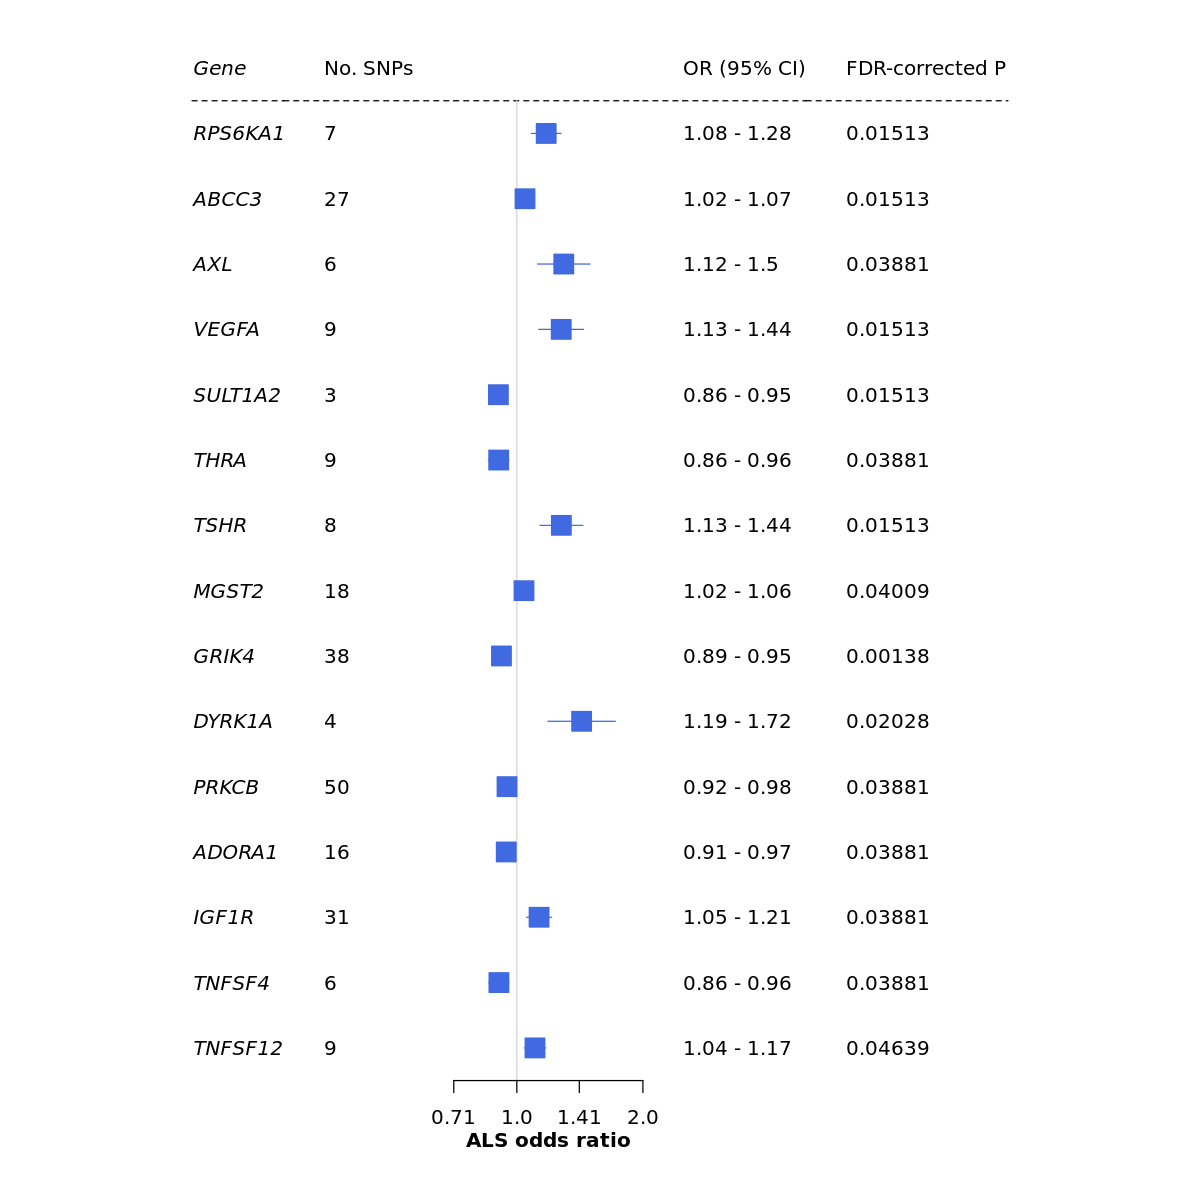

In [125]:
library("forestplot")

table_text <- genes[, c("exposure","nsnp", "or_ci_full", "fdr_round")]
table_text <- rbind(c("Gene", "No. SNPs", "OR (95% CI)", "FDR-corrected P"), table_text)

forest_genes <- rbind(c(NA, NA, NA, NA),genes)

forestplot(table_text, # columns to include
           graph.pos = 3, # where graph is
           boxsize = .3,
           align = "l",
           mean = forest_genes$or,
           lower = forest_genes$or_lci95,
           upper = forest_genes$or_uci95,
           xlog=TRUE, # log scale
           xlab="ALS odds ratio",
            col=fpColors(box="royalblue", line = "royalblue"),
           hrzl_lines = list("2" = gpar(lty = 2)),
           txt_gp = fpTxtGp(summary = (lapply(c(3,1,1,1),
                                              function(val)  gpar(fontface = val, cex = 1))),
                            label = (lapply(c(3,1,1,1),
                                            function(val)  gpar(fontface = val, cex = 1))),
                            ticks = gpar(cex=1, fontface = "plain"),
                            xlab  = gpar(fontface="bold", cex = 1)),
           fn.ci_sum=function(col, size, ...) {fpDrawNormalCI(clr.line = col, clr.marker = col, size=.2, ...)}
)

In [118]:
table_text

,exposure,nsnp,or_ci_full,fdr_round
,<chr>,<dbl>,<chr>,<dbl>
122,RPS6KA1,7,1.08 - 1.28,0.01513
228,ABCC3,27,1.02 - 1.07,0.01513
388,AXL,6,1.12 - 1.5,0.03881
544,VEGFA,9,1.13 - 1.44,0.01513
618,SULT1A2,3,0.86 - 0.95,0.01513
832,THRA,9,0.86 - 0.96,0.03881
1301,TSHR,8,1.13 - 1.44,0.01513
1352,MGST2,18,1.02 - 1.06,0.04009
1824,GRIK4,38,0.89 - 0.95,0.00138


In [2]:
system('dx upload run_mr.ipynb', intern=TRUE)

Warning message in system("dx upload run_mr.ipynb", intern = TRUE):
“running command 'dx upload run_mr.ipynb' had status 3”


character(0)
attr(,"status")
[1] 3
attr(,"errmsg")
[1] "Resource temporarily unavailable"